In [33]:
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Data Creation

In [34]:
time_slots = ['Morning', 'Afternoon', 'Evening', 'Night']
appliances = ['Fridge', 'AC', 'Heater', 'Washing Machine', 'Oven']
data = []

for day in range(90):  # Data for 30 days
    for time in time_slots:
        for appliance in appliances:
            energy = np.round(random.uniform(0.5, 3.0), 2)  # Energy in kWh
            data.append([day, time, appliance, energy])

df = pd.DataFrame(data, columns=['Day', 'Time', 'Appliance', 'Energy'])
print(df.head())

   Day     Time        Appliance  Energy
0    0  Morning           Fridge    2.28
1    0  Morning               AC    0.66
2    0  Morning           Heater    2.84
3    0  Morning  Washing Machine    1.96
4    0  Morning             Oven    1.25


This snippet creates a dataset for 90 days, detailing energy consumption for different times of the day and various appliances.

# 2. Sorting Data

In [35]:
sorted_data = df.sort_values(by=['Energy'], ascending=False)
print(sorted_data.head())

      Day       Time        Appliance  Energy
66      3  Afternoon               AC    3.00
1563   78    Morning  Washing Machine    3.00
1345   67  Afternoon           Fridge    3.00
694    34    Evening             Oven    2.99
1065   53  Afternoon           Fridge    2.99


Here, the dataset is sorted by energy consumption, making it easy to identify the highest energy-consuming appliances or times.

# 3. Creating a Hash Table for Energy Data

In [36]:
energy_data = {}
for index, row in df.iterrows():
    key = (row['Day'], row['Time'], row['Appliance'])
    energy_data[key] = row['Energy']

print(energy_data[(0, 'Morning', 'Fridge')])

2.28


This code creates a hash table to store and quickly retrieve energy data, which is essential for efficient data handling in the app.

# 4. Preparing Data for Machine Learning

In [37]:
df_numerical = pd.get_dummies(df, columns=['Time', 'Appliance'])

X = df_numerical.drop('Energy', axis=1)
y = df_numerical['Energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

This snippet prepares the dataset for machine learning by encoding categorical variables and splitting the data into training and testing sets.

# 5. Linear Regression Model

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

A Linear Regression model is built and trained here to predict future energy consumption.

# 6. Cost Prediction and Estimation

In [39]:
cost_per_kWh = 0.15

predicted_cost = np.sum(y_pred) * cost_per_kWh
print(f"Predicted total cost for the next period: ${predicted_cost:.2f}")

monthly_energy = df.groupby('Day')['Energy'].sum().mean()  
estimated_monthly_bill = monthly_energy * 30 * cost_per_kWh 
print(f"Estimated monthly bill: ${estimated_monthly_bill:.2f}")

Predicted total cost for the next period: $95.47
Estimated monthly bill: $159.25


This code estimates future costs and monthly bills based on the model's predictions, which is useful for budget planning within the app.

# 7. Graphical Representations

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

## # 1. Daily Energy Consumption Trend

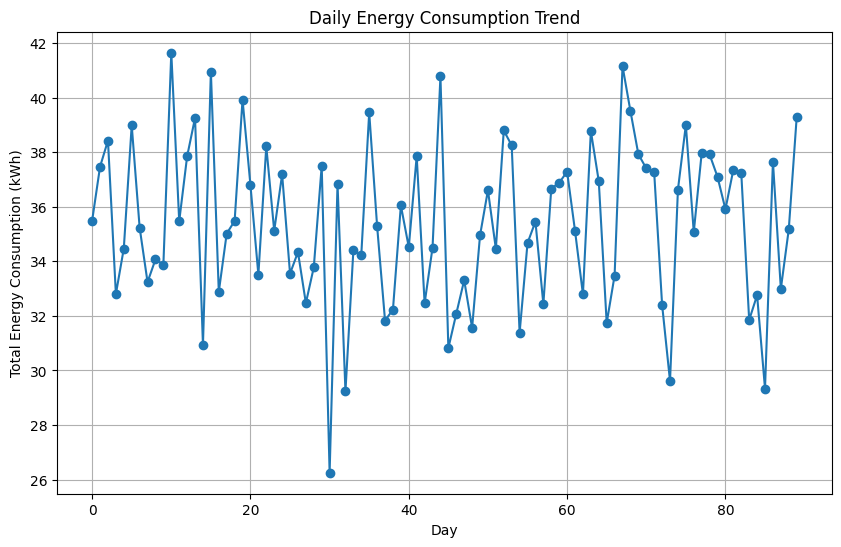

In [41]:
daily_energy = df.groupby('Day')['Energy'].sum()
plt.figure(figsize=(10, 6))
plt.plot(daily_energy, marker='o', linestyle='-')
plt.title('Daily Energy Consumption Trend')
plt.xlabel('Day')
plt.ylabel('Total Energy Consumption (kWh)')
plt.grid(True)
plt.show()

- Purpose: This line graph visualizes the total energy consumption for each day over the 90-day period.
Insights:
- Trends and Fluctuations: Users can identify days with unusually high or low energy usage, helping to pinpoint events or behaviors that led to these variations.
- Consumption Patterns: By observing the trend over time, users can detect consistent patterns, like increased energy use on weekends or specific days, aiding in more informed energy management.

## # 2. Energy Consumption by Time Slot

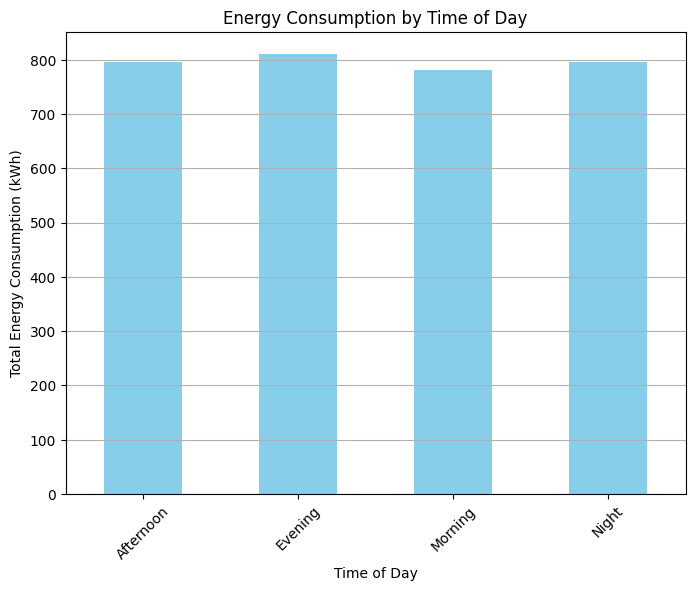

In [42]:
time_energy = df.groupby('Time')['Energy'].sum()
plt.figure(figsize=(8, 6))
time_energy.plot(kind='bar', color='skyblue')
plt.title('Energy Consumption by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

- Purpose: This bar chart breaks down the total energy consumption into different time slots: Morning, Afternoon, Evening, and Night.
Insights:
- Peak Usage Times: Users can easily spot which part of the day has the highest energy consumption, which is crucial for planning and shifting usage to off-peak hours if possible.
- Targeted Energy-Saving Measures: Identifying time slots with high energy usage allows for targeted energy-saving strategies, such as adjusting thermostat settings or rescheduling appliance use.

## # 3. Energy Consumption by Appliance

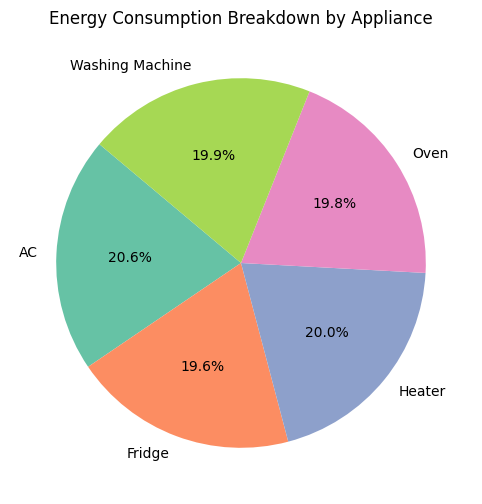

In [43]:
appliance_energy = df.groupby('Appliance')['Energy'].sum()
plt.figure(figsize=(8, 6))
appliance_energy.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Energy Consumption Breakdown by Appliance')
plt.ylabel('')
plt.show()

- Purpose: This pie chart provides a percentage breakdown of total energy consumption by different appliances.
Insights:
- Major Energy Consumers: Users can identify which appliances are consuming the most energy, which is vital for implementing specific measures to reduce consumption, like using energy-efficient appliances.
- Balanced Usage: The chart helps in understanding the balance of energy usage among appliances, aiding in spreading out usage or replacing high-energy-consuming appliances with more efficient models.